# Load and display IGC files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gmplot
import time
import os

In [2]:
import igc

In [3]:
ls parapente_traces_dataset/

2013-04-07-igcfile-23426-32487.igc    2017-08-12-igcfile-28043-118045.igc
2014-07-08-igcfile-47462-52467.igc    2017-09-24-igcfile-18012-119698.igc
2017-05-16-igcfile-136850-107808.igc


In [4]:
f1 = open("parapente_traces_dataset/2014-07-08-igcfile-47462-52467.igc", "r")

In [5]:
data = f1.read().splitlines()

In [6]:
data[0:15]

['AXGD100 Flymaster F1, V1.3, S/N 236',
 'HURL:https://parapente.ffvl.fr/cfd/liste/2013/vol/20149865',
 'HFDTE080714',
 'HOPLTPILOT: combes',
 'HOGTYGLIDERTYPE: cayenne 4',
 'HOGIDGLIDERID: None',
 'HODTM100GPSDATUM: WGS-84',
 'HOCIDCOMPETITIONID: ',
 'HOCCLCOMPETITION CLASS: None',
 'HOSITSite: None',
 'B0715242111989S05538785EA0216502318',
 'B0715252111989S05538787EA0216502318',
 'B0715262111988S05538790EA0216502318',
 'B0715272111988S05538792EA0216602320',
 'B0715282111991S05538788EA0216502321']

In [7]:
d40 = igc.read_igc_B(data[40])
d40

{'alt_gps': 2307.0,
 'alt_p': 2148.0,
 'lat': -21.200383333333335,
 'long': 55.64516666666667,
 'time': time.struct_time(tm_year=1900, tm_mon=1, tm_mday=1, tm_hour=7, tm_min=15, tm_sec=54, tm_wday=0, tm_yday=1, tm_isdst=-1)}

In [8]:
igc1 = igc.igc_trace()
igc1.read_igc_file("parapente_traces_dataset/2014-07-08-igcfile-47462-52467.igc")

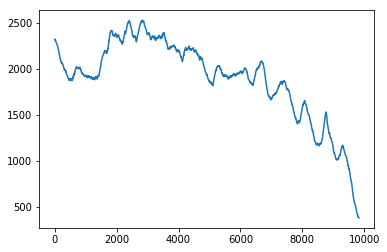

In [9]:
plt.plot(igc1.trace['altitudes_gps'])

## Make one trace with heatmap

In [10]:
start = [igc1.trace['latitudes'][0], igc1.trace['longitudes'][0]]
stop = [igc1.trace['latitudes'][-1], igc1.trace['longitudes'][-1]]

gmap = gmplot.GoogleMapPlotter(start[0], start[1], 16)
gmap.plot(igc1.trace['latitudes'], igc1.trace['longitudes'], 'cornflowerblue', edge_width=3, c='red')
# gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
gmap.scatter([start[0], stop[0]], [start[-1], stop[-1]], 'k', marker=True)
gmap.heatmap(igc1.trace['latitudes'], igc1.trace['longitudes'])

gmap.draw("trace.html")

## Heatmap

In [11]:
src = 'parapente_traces_dataset/'
lat_heat = []
long_heat = []
for file in [src + f for f in os.listdir(src) if f.endswith('igc')]:
    print(file)
    igcf = igc.igc_trace()
    igcf.read_igc_file(file)
    lat_heat.append(igcf.trace['latitudes'])
    long_heat.append(igcf.trace['longitudes'])

lat_heat = np.concatenate(lat_heat)
long_heat = np.concatenate(long_heat)
gmap = gmplot.GoogleMapPlotter(lat_heat[0], long_heat[0], 16)

gmap.heatmap(lat_heat, long_heat)

parapente_traces_dataset/2017-09-24-igcfile-18012-119698.igc
parapente_traces_dataset/2013-04-07-igcfile-23426-32487.igc
parapente_traces_dataset/2014-07-08-igcfile-47462-52467.igc
parapente_traces_dataset/2017-08-12-igcfile-28043-118045.igc
parapente_traces_dataset/2017-05-16-igcfile-136850-107808.igc


In [13]:
gmap.draw("heatmap.html")